# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1304 Шаврин Алексей. Вариант №52.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Введём понятия для оценки числа операций:<br>
<ol>
    <li>$\lambda(n) = \lfloor log_{2}(n) \rfloor$ - уменьшенная на 1 длина бинарной записи n</li>
    <li>$\nu(n)$ - вес Хэмминга для бинарной записи числа $n$ (число единиц в бинарной записи)</li>
</ol>
Рассмотрим методы вычисления одночленов за минимальное число операций, а также приведём некоторые оценки количества операций для вычисления одночленов.<br>

### 1) Бинарный метод $SX$
Алгоритм для возведения в степень $n$ бинарным методом $SX$:
<ol>
<li>Представим $n$ в бинарном виде и отбросим старший бит</li>
<li>Преобразуем бинарную запись $n$ в запись в формате $SX:$<center>$1 \Rightarrow SX$<br>$0 \Rightarrow S$</center></li>
<li>Запись интерпретируем следующим образом:<center>$S \Rightarrow x = x ^ 2$<br>$X \Rightarrow x = x * x$</center></li>
</ol>
Число операций для бинарного метода $SX$ можно рассчитать по следующей формуле: $\lambda(n) + \nu(n) - 1$
    
### 2) Бинарный метод возведения справа налево 
Алгоритм для возведения в степень $n$ методом справа налево:
<ol>
    <li>Инициализируем стартовые параметры $N = n; Y = 1; Z = x$</li>
    <li>Если $N$ чётно - переходим на пункт 3, иначе - на пункт 4</li>
    <li>Переприсваиваем $N = \lfloor N/2 \rfloor$, а $Z = Z * Z$ и переходим на пункт 2</li>
    <li>Переприсваиваем $N = \lfloor N/2 \rfloor$, а $Y = Z * Y$</li>
    <li>Если $N = 0$, то возвращаем $Y$ как ответ и выходим из алгоритма. Иначе - переприсваиваем $Z = Z * Z$ и переходим на пункт 2</li>
</ol>
Число операций для бинарного метода справа налево можно вычислить по следующей формуле: $\lambda(n) + \nu(n)$

### 3) Метод множителей
Алгоритм для возведения в степень $n$ методом множителей:
<ol>
    <li>Представим $n$ в виде разложения $n = p * q$, где $p$ - наименьший простой множитель $n$, а $q > 1$. Таким образом, $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$</li>
    <li>Если $n$ - простое, то вычислим $x^{n-1}$ и умножим его на x</li>
    <li>При $n = 1$ - получим $x^n$</li>
</ol>

### 4) Дерево степеней
Алгоритм построения дерева степеней до $k$-го уровня:
<ol>
    <li>Это корень дерева  - $1$</li>
    <li>$k+1$-й уровень строим по следующей схеме:<br> берётся $i$ узел на $k$-м уровне слева направо и к нему присоединяются узлы $i+a_{0}, i+a_{1}, ..., i+a_{k-1}$</li>
    <li>Если узел уже есть в дереве - он не добавляется</li>
</ol>


## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1) Бинарный метод SX

Реализуем функцию $binary\_sx\_method$, принимающую на вход целочисленное значение $degree$, являющееся степенью, в которую нужно возвести переменную. В функции значение степени записывается в бинарном виде без старшего бита. Далее, по алгоритму, единицы заменяются на $SX$, нули - на $S$. Переменная $current\_element$ будет хранить итоговое значение на текущем шаге, которое мы получим в ходе итерации по преобразованной $SX$-строке. В переменной $answer$ будет храниться список всех хзначений на каждом шаге. Для наглядности выведем бинарный вид степени, $SX$-представление степени, а также значение $answer$.

In [124]:
def binary_sx_method(degree: int):
    if degree < 1: # Модификация
        return 1
    
    binary_degree_version = str(bin(degree)[3:]) # Представляем степень в 2СС и отбрасываем старший бит
    show("binary geree version: " + binary_degree_version)
    
    sx_degree_version = binary_degree_version.replace("0", "S").replace("1", "SX") # Представляем степень в SX формате
    show("sx degree version: " + sx_degree_version)
    
    current_element = var('x')
    answer = [current_element]
    
    for element in sx_degree_version:
        if element == "S":
            current_element **= 2
        else:
            current_element *= x
        answer.append(current_element)
    
    show("the sequence of calculations: ", answer)
    show("count operation: " + str(len(answer) - 1))
    return current_element
    

Проверим работу программы при $degree = 0, 9, 23, 36$ 

In [125]:
# Пример работы программы при degree = 0
show(binary_sx_method(0))

1

In [126]:
# Пример работы программы при degree = 9
show(binary_sx_method(9))

'binary geree version: 001'

'sx degree version: SSSX'

'the sequence of calculations: ' [x, x^2, x^4, x^8, x^9]

'count operation: 4'

x^9

In [127]:
# Пример работы программы при degree = 23
show(binary_sx_method(23))

'binary geree version: 0111'

'sx degree version: SSXSXSX'

'the sequence of calculations: ' [x, x^2, x^4, x^5, x^10, x^11, x^22, x^23]

'count operation: 7'

x^23

In [128]:
# Пример работы программы при degree = 36
show(binary_sx_method(36))

'binary geree version: 00100'

'sx degree version: SSSXSS'

'the sequence of calculations: ' [x, x^2, x^4, x^8, x^9, x^18, x^36]

'count operation: 6'

x^36

**Проверим оценку числа операций для данных значений $degree$:**
<ol>
    <li>$degree = 9$<br>$lambda(n) = \lfloor log_{2}(9) \rfloor = 3$<br>$\nu(n) = 2$<br>$\lambda(n) + \nu(n) - 1 = 4 $<br>Верно</li><br>
    <li>$degree = 26$<br>$\lambda(n) = \lfloor log_{2}(26) \rfloor = 4$<br>$\nu(n) = 4$<br>$\lambda(n) + \nu(n) - 1 = 7$<br>Верно</li><br>
    <li>$degree = 36$<br>$\lambda(n) = \lfloor log_{2}(36) \rfloor = 5$<br>$\nu(n) = 2$<br>$\lambda(n) + \nu(n) - 1 = 6$<br>Верно</li><br>
Можно сделать вывод, что для наших $degree$ формула для вычисления количества операций корректна.

### Вывод
Реализован бинарный метод $SX$, проверена его работоспособность, корректность и теоретическая оценка числа операций. Благодаря теоретической оценке можно узнать, за сколько итераций будет произведён расчёт. Метод довольно прост как в реализации, так и в понимании.

### 2) Метод возведения справа налево

Реализуем функцию $right\_to\_left\_construction\_method$, принимающую на вход целочисленное значение $degree$, являющееся степенью, в которую нужно возвести переменную. Внутри функции реализована инициализация нулевой итерации, а также основной алгоритм. Реализована возможность вывода промежуточных значений $iterarion, N, Y, Z$.

In [129]:
def right_to_left_construction_method(degree):
    if degree < 1: # Модификация
        return 1
    
    iteration = 0
    N, Y, Z = degree, 1, var('x')
    print(f"i: {iteration}\tN: {N}\tY: {Y}\tZ: {Z}")
    
    while True:
        if (N % 2 == 0):
            N = floor(N / 2)
            Z *= Z
        else:
            N = floor(N / 2)
            Y *= Z
            if (N == 0):
                iteration += 1
                print(f"i: {iteration}\tN: {N}\tY: {Y}\tZ: {Z}")
                break
            else:
                Z *= Z
        iteration += 1
        print(f"i: {iteration}\tN: {N}\tY: {Y}\tZ: {Z}")
    return Y

Проверим работу программы при $degree = 0, 9, 23, 36$

In [130]:
# Пример работы программы при degree = 0
show(right_to_left_construction_method(0))

1

In [131]:
# Пример работы программы при degree = 9
show(right_to_left_construction_method(9))

i: 0	N: 9	Y: 1	Z: x
i: 1	N: 4	Y: x	Z: x^2
i: 2	N: 2	Y: x	Z: x^4
i: 3	N: 1	Y: x	Z: x^8
i: 4	N: 0	Y: x^9	Z: x^8


x^9


| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     9      |      1     |      $x$   |
|      1     |     4      |      $x$   |    $x^2$   |
|      2     |     2      |      $x$   |     $x^4$  |
|      3     |     1      |      $x$   |     $x^8$  |
|      4     |     0      |      $x^9$ |    $x^{8}$|

In [132]:
# Пример работы программы при degree = 23
show(right_to_left_construction_method(23))

i: 0	N: 23	Y: 1	Z: x
i: 1	N: 11	Y: x	Z: x^2
i: 2	N: 5	Y: x^3	Z: x^4
i: 3	N: 2	Y: x^7	Z: x^8
i: 4	N: 1	Y: x^7	Z: x^16
i: 5	N: 0	Y: x^23	Z: x^16


x^23


| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     23     |      1     |      $x$   |
|      1     |     11     |      $x$   |    $x^2$   |
|      2     |      5     |      $x^3$ |     $x^4$  |
|      3     |      2     |      $x^7$ |     $x^8$  |
|      4     |      1     |      $x^7$ |    $x^{16}$|
|      5     |      0     |      $x^{23}$|    $x^{16}$|

In [133]:
# Пример работы программы при degree = 36
show(right_to_left_construction_method(36))

i: 0	N: 36	Y: 1	Z: x
i: 1	N: 18	Y: 1	Z: x^2
i: 2	N: 9	Y: 1	Z: x^4
i: 3	N: 4	Y: x^4	Z: x^8
i: 4	N: 2	Y: x^4	Z: x^16
i: 5	N: 1	Y: x^4	Z: x^32
i: 6	N: 0	Y: x^36	Z: x^32


x^36


| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     36     |      1     |      $x$   |
|      1     |     18     |      1     |    $x^2$   |
|      2     |      9     |      1     |     $x^4$  |
|      3     |      4     |    $x^4$   |     $x^8$  |
|      4     |      2     |    $x^4$   |    $x^{16}$|
|      5     |      1     |    $x^4$   |    $x^{32}$|
|      6     |      0     |    $x^{36}$|    $x^{32}$|

**Проверим оценку числа операций для данных значений $degree$:**
<ol>
    <li>$degree = 9$<br>$lambda(n) = \lfloor log_{2}(9) \rfloor = 3$<br>$\nu(n) = 2$<br>$\lambda(n) + \nu(n) = 5 $<br>Верно</li><br>
    <li>$degree = 26$<br>$\lambda(n) = \lfloor log_{2}(26) \rfloor = 4$<br>$\nu(n) = 4$<br>$\lambda(n) + \nu(n) = 8$<br>Верно</li><br>
    <li>$degree = 36$<br>$\lambda(n) = \lfloor log_{2}(36) \rfloor = 5$<br>$\nu(n) = 2$<br>$\lambda(n) + \nu(n) = 7$<br>Верно</li><br>
Можно сделать вывод, что для наших $degree$ формула для вычисления количества операций корректна.

### Вывод
Реализован метод возведения справа на лево, проверена его работоспособность, корректность и теоретическая оценка числа операций. Благодаря теоретической оценке можно узнать, за сколько итераций будет произведён расчёт. Метод прост в реализации, но не так прост в понимании. В общем случае значение $Z$ будет равно $x^{2^{i-2}}$, где $i$ - число итераций метода.

### 3) Сравнение бинароног метода SX и метода возведения справа налево

Опираясь на оценку числа операций, можно сказать, что количество операций в методе $SX$  меньше, чем в методе возведения справа налево. В методе $SX$ число операций рассчитывается как $\lambda(n) + \nu(n) - 1$, а в методе возведения справа налево как $\lambda(n) + \nu(n)$ или же можно оценить как $\lfloor log_{2}(n) \rfloor + 2$.

### Вывод

Исходя из оценки количества иераций можно сделать вывод, что бинарный метод $SX$ выгоднее метода возведения справа налево.

### 4) Метод множителей

Выполним метод множителей вручную для некоторых степеней по алгоритму из теоретического положения.

<ol>
<li>$degree = 9$</li>
$\hspace{1cm}$$x^9 = (x^3)^3$<br>
$\hspace{1cm}$$(x^3)^3 = (x^3)^2 * (x^3)$ - (1 операция)<br>
$\hspace{1cm}$$(x^3)^2 = (x^3)*(x^3)$ - (1 операция)<br>
$\hspace{1cm}$$x^3 = (x^2)*x$ - (1 операция)<br>  
$\hspace{1cm}$$x^2 = x*x$ - (1 операция)<br>
Вся последовательность: $x, x^2, x^3, x^6, x^9$<br>   
4 операции, как и в методе $SX$<br><br>  
    
<li>$degree = 23$</li>
$\hspace{1cm}$$x^{23} = (x^{22})*x$ - (1 операция)<br>
$\hspace{1cm}$$x^{22} = (x^2)^{11} = (x^2)^{10}*x$ - (1 операция)<br>
$\hspace{1cm}$$(x^2)^{10} = ((x^2)^2)^5 = (x^2)^2*((x^2)^2)^4$ - (1 операция)<br>
$\hspace{1cm}$$((x^2)^2)^4 = (((x^2)^2)^2)^2 = (x^2)^2)^2 * (x^2)^2)^2$ - (1 операция)<br>  
$\hspace{1cm}$$((x^2)^2)^2 = (x^2)^2 * (x^2)^2$ - (1 операция)<br> 
$\hspace{1cm}$$(x^2)^2 = x^2 * x^2$ - (1 операция)<br> 
$\hspace{1cm}$$x^2 = x*x$ - (1 операция)<br>
Вся последовательность: $x, x^2, x^4, x^8, x^{16}, x^{20}, x^{22}, x^{23}$<br>   
7 операций, как и в методе $SX$<br><br>
    
<li>$degree = 36$</li>
$\hspace{1cm}$$x^{36} = (x^3)^{12}$<br>
$\hspace{1cm}$$(x^3)^{12} = ((x^3)^3)^4$<br>
$\hspace{1cm}$$((x^3)^3)^4 = ((x^3)^3)^2 * ((x^3)^3)^2$ - (1 операция)<br>
$\hspace{1cm}$$((x^3)^3)^2 = (x^3)^3 * (x^3)^3$ - (1 операция)<br>
$\hspace{1cm}$$(x^3)^3 = (x^3)^2 * x^3$ - (1 операция)<br>
$\hspace{1cm}$$(x^3)^2 = x^3 * x^3$ - (1 операция)<br> 
$\hspace{1cm}$$x^3 = x^2 * x$ - (1 операция)<br>
$\hspace{1cm}$$x^2 = x*x$ - (1 операция)<br>
Вся последовательность: $𝑥, 𝑥^2, 𝑥^3, x^6, 𝑥^9, 𝑥^{18}, 𝑥^{36}$<br>   
6 операций, как и в методе $SX$<br><br>  
</ol>

**На всех выбранных ранее значениях метод множителей дает значения идентичные методу SX, поэтому рассмотрим еще 2 значения, при которых количество итераций будет отличаться**<br><br>
Сначала приведены результаты работы метода $SX$ для $degree = 33, 15$

In [134]:
# Пример работы программы при degree = 33
show(binary_sx_method(33))

'binary geree version: 00001'

'sx degree version: SSSSSX'

'the sequence of calculations: ' [x, x^2, x^4, x^8, x^16, x^32, x^33]

'count operation: 6'

x^33

In [135]:
# Пример работы программы при degree = 15
show(binary_sx_method(15))

'binary geree version: 111'

'sx degree version: SXSXSX'

'the sequence of calculations: ' [x, x^2, x^3, x^6, x^7, x^14, x^15]

'count operation: 6'

x^15

Теперь расчитаем метод множителей для этих же значений

<ol>
<li>$degree = 33$</li>
$\hspace{1cm}$$x^{33} = (x^3)^{11} = (x^3)^{10}*x^3$ - (1 операция)<br>
$\hspace{1cm}$$(x^3)^{10} = ((x^3)^5)^2 = (x^3)^5*(x^3)^5$ - (1 операция)<br> 
$\hspace{1cm}$$(x^3)^5 = (x^3)^4*x^3$ - (1 операция)<br>
$\hspace{1cm}$$(x^3)^4 = (x^3)^2*(x^3)^2$ - (1 операция)<br>
$\hspace{1cm}$$(x^3)^2 = x^3*x^3$ - (1 операция)<br>
$\hspace{1cm}$$x^3 = x^2*x$ - (1 операция)<br>
$\hspace{1cm}$$x^2 = x*x$ - (1 операция)<br>
Вся последовательность: $𝑥, 𝑥^2, 𝑥^3, x^6, x^{12}, 𝑥^{15}, 𝑥^{30}, 𝑥^{33}$<br>   
7 операций, а в методе $SX$ всего 6 операций (метод множителей менее эффективен)<br><br> 
    
<li>$degree = 15$</li>
$\hspace{1cm}$$x^{15} = (x^3)^5 = (x^3)^4*x^3$ - (1 операция)<br>
$\hspace{1cm}$$(x^3)^4 = (x^3)^2 * (x^3)^2$ - (1 операция)<br>
$\hspace{1cm}$$(x^3)^2 = x^3 * x^3$ - (1 операция)<br>
$\hspace{1cm}$$x^3 = x^2 * x$ - (1 операция)<br>
$\hspace{1cm}$$x^2 = x * x$ - (1 операция)<br>
Вся последовательность: $𝑥, 𝑥^2, 𝑥^3, x^6, x^{12}, 𝑥^{15}$<br>   
5 операций, а в методе $SX$ 6 операций (метод множителей более эффективен)<br><br>   
</ol>

#### Вывод
Таким образом, рассмотрен метод множителей для нескольких $n$. Его преимущество заключается в простоте идеи и возможности легко посчитать число операций для возведения числа в степень "руками". Также, метод множителей может быть быстрее, чем бинарный ($n=15$), он иногда может быть медленнее ($n=33$). Его минус - сложность реализации (скорее всего придётся применять рекурсию).

### 5) Дерево степеней

Реализуем класс $DegreeTree$ до заданного уровня $count\_level$. Для хранения структуры дерева используем словарь вида {узел: список родителей (всегда один)}. В методе $\_\_create\_tree$ перебирая уровни от $0$ до $count\_level$, просматриваем все возможные новые элементы, которые можно вставить на следующий уровень. Если элемента нет в дереве, то вставляем его. С помощью $\_\_get\_path\_to\_node$ строим цепочку от 0-го узла до рассматриваемого. В методе  $\_\_get\_branches\_to\_node$ строим цепочку ветвей до рассматриваемого узла, этот метод необходим для визуального выделения пути до узла. Метод show выводит граф, с выделенным путем до искомого узла $desired\_node$. Метод $show\_answer$ выводит цепочку элементов на каждом шаге итераций и количество вычислений. Метод $find\_count\_operations$ строит дерево до тех пор пока не найдет нужный узел и подсчитывает количество операций (необходим для сравнения).

In [136]:
class DegreeTree:
    def __init__(self, count_levels: int) -> None:
        """
        This method initializes the tree
        """
        
        self.__count_levels = count_levels # количество уровней дерева
        self.__tree = {1: []}              # словарь узлов дерева с путями до них
        self.__create_tree()
    
    def __create_tree(self) -> None:
        """
        This method builds a tree
        """
        
        current_level_nodes = [1]                             # список узлов на текущем уровне
        for current_level in range(self.__count_levels):      # цикл по уровням дерева
            next_level_nodes = []                             # список узлов на следующем уровне
            for parent_node in current_level_nodes:           # цикл по узлам текущего уровня
                path_to_parent_node  = self.__get_path_to_node(parent_node)
                for node_in_path in path_to_parent_node:                 # цикл по узлам в пути до текущего родителя
                    child_node = parent_node + node_in_path              # возможный новый дочерний узел
                    if not(child_node in self.__tree):                   # проверка на отсутствие узла в дереве
                        self.__tree[child_node] = [parent_node]
                        next_level_nodes.append(child_node)
            current_level_nodes = next_level_nodes                        # переход на новый уровень
     
        
    def find_count_operations(self, desired_node):
        """
        This method builds a tree until it finds the desired node and returns the number
        of operations to search for this node
        """
        
        self.__tree = {1: []}
        count_operation = 0
        is_node_found = False
        current_level_nodes = [1]                             # список узлов на текущем уровне
        while not is_node_found:                              # строим дерево пока не найдем узел
            count_operation += 1
            next_level_nodes = []                             # список узлов на следующем уровне
            for parent_node in current_level_nodes:           # цикл по узлам текущего уровня
                path_to_parent_node  = self.__get_path_to_node(parent_node)
                for node_in_path in path_to_parent_node:                 # цикл по узлам в пути до текущего родителя
                    child_node = parent_node + node_in_path              # возможный новый дочерний узел
                    if child_node == desired_node:
                        is_node_found = True
                    if not(child_node in self.__tree):                    # проверка на отсутствие узла в дереве
                        self.__tree[child_node] = [parent_node]
                        next_level_nodes.append(child_node)
            current_level_nodes = next_level_nodes                        # переход на новый уровень
        return count_operation
    
    
    def __get_path_to_node(self, node: int):
        """
        This method restores the path from the node to the root
        """
        
        path = [node]
        while node != 1:
            node = self.__tree[node][0]
            path.append(node)
            
        return path[::-1]
    
    
    def __get_branches_to_node(self, node: int):
        """
        This method returns a list of branches to the desired node
        """
        path = self.__get_path_to_node(node)
        branches = []
        for i in range(len(path)-1):
            branches.append((path[i], path[i+1]))
        return branches
    
    
    def show(self, desired_node=None) -> None:
        """
        This method displays the graph and highlights the path to the desired node on it
        """
        
        graph_view = Graph(self.__tree)
        if not desired_node in self.__tree:
            show("This node is not in the graph")
            
        plt = graph_view.plot(layout='tree', tree_root=1, vertex_color="skyblue", by_component=True,
                             edge_colors={(1, 0, 0): self.__get_branches_to_node(desired_node)})
        plt.show()
    
    
    def show_answer(self, desired_node=None):
        if not desired_node in self.__tree:
            show("This node is not in the graph")
        
        x = var('x')
        answer = list()
        for degree in self.__get_path_to_node(desired_node):
            answer.append(x^degree)
        show("chain: ", answer)
        show("count operations: " + str(len(answer) - 1))
        

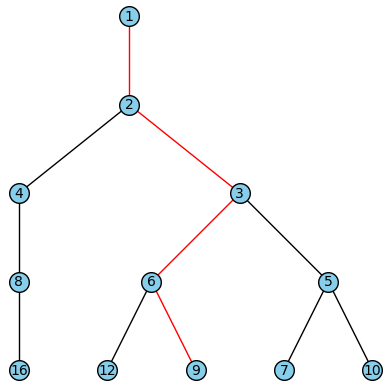

'chain: ' [x, x^2, x^3, x^6, x^9]

'count operations: 4'

In [137]:
degree_tree = DegreeTree(4)
degree_tree.show(9)
degree_tree.show_answer(9)

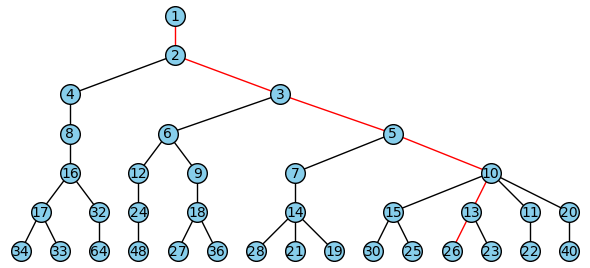

'chain: ' [x, x^2, x^3, x^5, x^10, x^13, x^26]

'count operations: 6'

In [138]:
degree_tree = DegreeTree(6)
degree_tree.show(26)
degree_tree.show_answer(26)

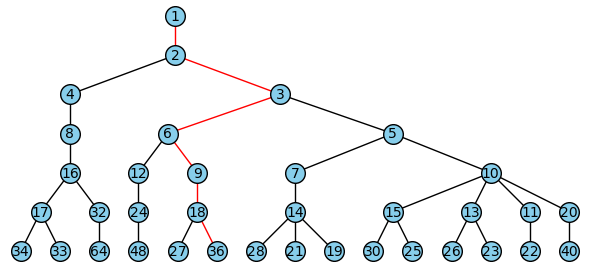

'chain: ' [x, x^2, x^3, x^6, x^9, x^18, x^36]

'count operations: 6'

In [139]:
degree_tree = DegreeTree(6)
degree_tree.show(36)
degree_tree.show_answer(36)

**Сравним данный метод с методом $SX$**.<br> 
Напишем функцию, возвращающую количество операций умножения для бинарного метода $SX$:

In [140]:
def get_sx_method_count_operations(n):
    return floor(log(n, 2)) + bin(n)[2:].count('1') - 1

Проверим, что дерево степеней не проигрывает бинарному методу (проверим до $n = 4444$)

In [118]:
degree_tree = DegreeTree(3)
is_degree_tree_better = True

for n in range(2, 4444):
    if get_sx_method_count_operations(n) < degree_tree.find_count_operations(n):
        is_degree_tree_better = False
        break
        
if is_degree_tree_better: 
    show("Degree tree better!")
else: 
    show("Degree tree worse!")


'Degree tree better!'

#### Вывод

Реализовано дерево степеней. Дерево отображается средствами $SageMath$ до заданного уровня $k$, путь от вершины дерева до заданного числа $n$ выделяется цветом.<br>
В результате сравнения данного метода с бинарным $SX$ выявлено, что дерево степеней ему не проигрывает $\Rightarrow$ выигрывает метод справа налево и метод множителей .

## Выводы

Общий вывод по проделанной работе.

Изучены и реализованы алгоритмы вычисления одночленов за минимальное число операций, а также отработан навык использования системы компьютерной алгебры *SageMath* для реализации алгоритмов.<br>
Реализованы следующие методы:
<ol>
    <li>бинарный метод $SX$</li>
    <li>бинарный метод возведения в степень справа налево</li>
    <li>рассмотрен метод множителей</li>
    <li>реализован алгоритм дерева степеней</li>
</ol>
Алгоритмы проверены на работоспособность, произведено сравнение с теоретическими положениями.<br>